<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
import urllib.request
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
# Download the data first
urllib.request.urlretrieve(url, "survey-data.csv")
# Then load the data
df = pd.read_csv("survey-data.csv")
# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


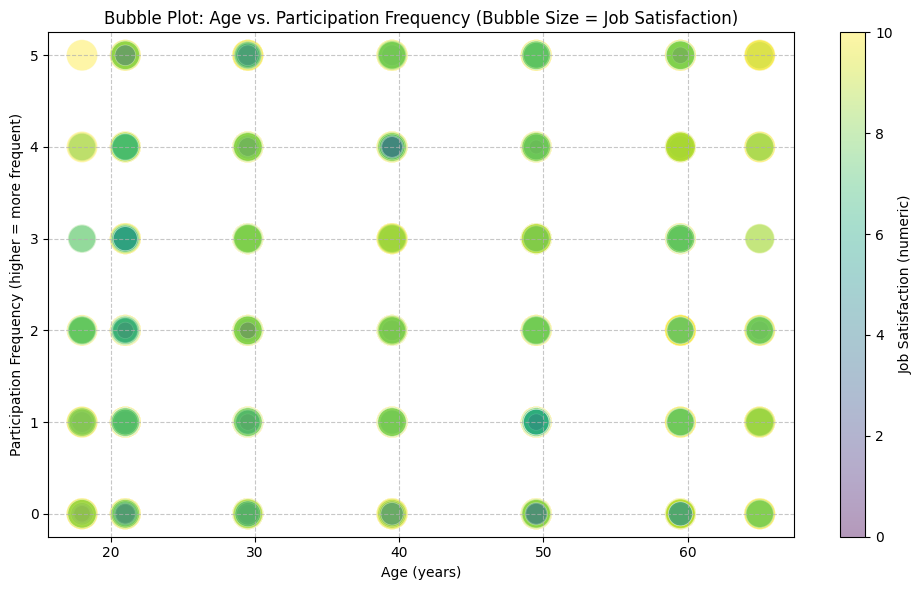

Bubble plot created successfully!


In [7]:
##Write your code here
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for Age, SOPartFreq, and JobSat
df_bubble = df[['Age', 'SOPartFreq', 'JobSat']].dropna()

# Convert Age to numeric midpoints for plotting
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

df_bubble['AgeNum'] = df_bubble['Age'].apply(age_to_midpoint)

# Map SOPartFreq to numeric values for plotting
freq_map = {
    'Multiple times per day': 5,
    'Daily or almost daily': 4,
    'A few times per week': 3,
    'A few times per month or weekly': 2,
    'A few times per month': 2,
    'Less than once per month or monthly': 1,
    'Less than once per month': 1,
    'I have never participated in Q&A on Stack Overflow': 0
}
df_bubble['SOPartFreqNum'] = df_bubble['SOPartFreq'].map(freq_map)

# Convert JobSat to numeric (already numeric strings in your data)
df_bubble['JobSatNum'] = pd.to_numeric(df_bubble['JobSat'], errors='coerce')

# Drop rows with missing numeric values
df_bubble = df_bubble.dropna(subset=['AgeNum', 'SOPartFreqNum', 'JobSatNum'])

# Scale bubble sizes for better visibility
sizes = 100 + (df_bubble['JobSatNum'] - df_bubble['JobSatNum'].min()) / (df_bubble['JobSatNum'].max() - df_bubble['JobSatNum'].min()) * 400

plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble['AgeNum'],
    df_bubble['SOPartFreqNum'],
    s=sizes,
    alpha=0.4,
    c=df_bubble['JobSatNum'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(label='Job Satisfaction (numeric)')
plt.title('Bubble Plot: Age vs. Participation Frequency (Bubble Size = Job Satisfaction)')
plt.xlabel('Age (years)')
plt.ylabel('Participation Frequency (higher = more frequent)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Bubble plot created successfully!")  

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


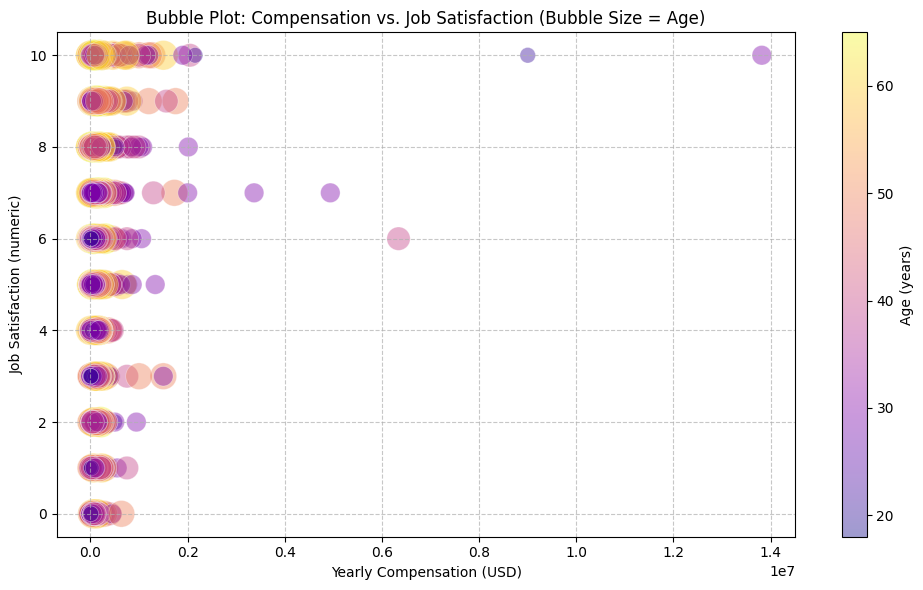

In [8]:
##Write your code here
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for ConvertedCompYearly, JobSat, and Age
df_bubble2 = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()

# Convert JobSat to numeric (already numeric strings in your data)
df_bubble2['JobSatNum'] = pd.to_numeric(df_bubble2['JobSat'], errors='coerce')

# Convert Age to numeric midpoints for plotting
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

df_bubble2['AgeNum'] = df_bubble2['Age'].apply(age_to_midpoint)

# Drop rows with missing numeric values
df_bubble2 = df_bubble2.dropna(subset=['ConvertedCompYearly', 'JobSatNum', 'AgeNum'])

# Scale bubble sizes for better visibility
sizes = 100 + (df_bubble2['AgeNum'] - df_bubble2['AgeNum'].min()) / (df_bubble2['AgeNum'].max() - df_bubble2['AgeNum'].min()) * 400

plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble2['ConvertedCompYearly'],
    df_bubble2['JobSatNum'],
    s=sizes,
    alpha=0.4,
    c=df_bubble2['AgeNum'],
    cmap='plasma',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(label='Age (years)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (numeric)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



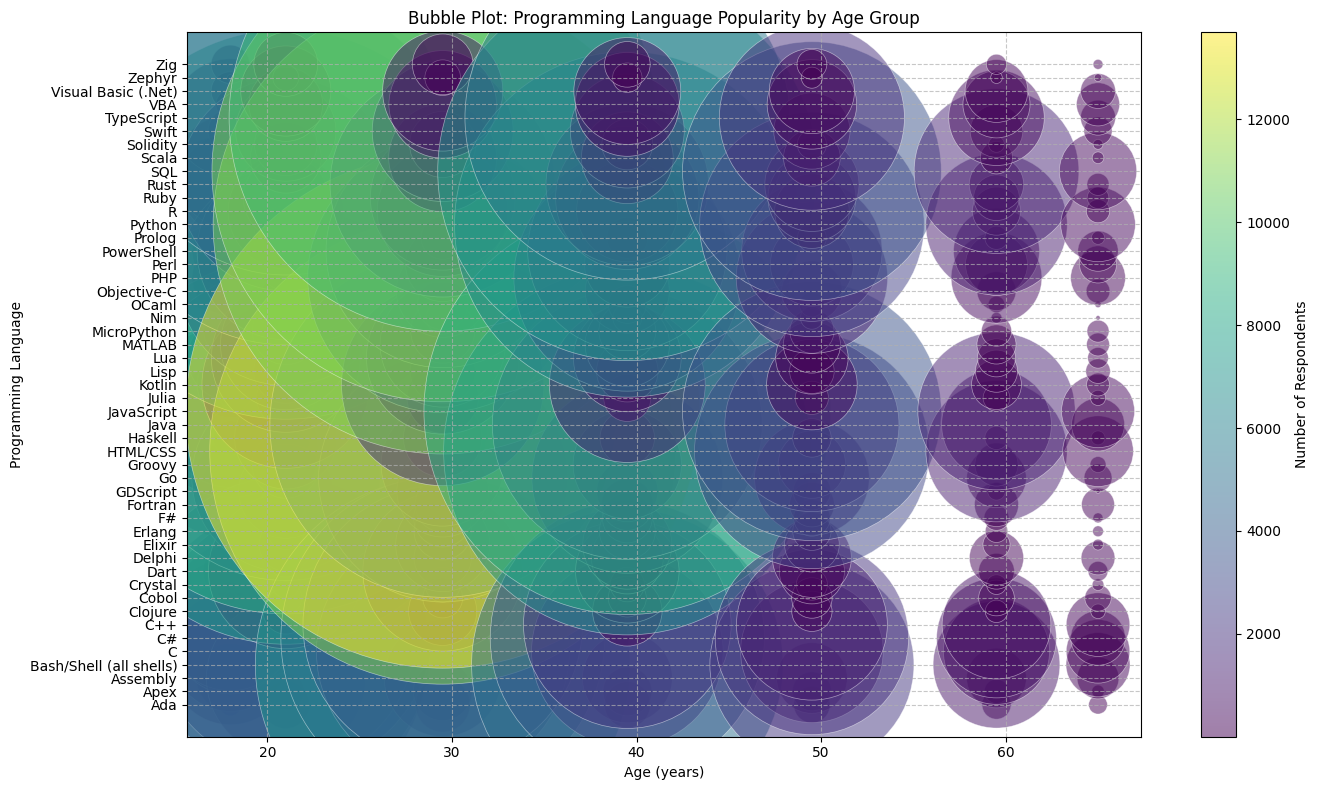

In [10]:
##Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for Age and LanguageHaveWorkedWith
df_lang = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Convert Age to numeric midpoints for grouping
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

df_lang['AgeNum'] = df_lang['Age'].apply(age_to_midpoint)

# Split languages and explode into separate rows
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Group by AgeNum and Language, count occurrences
lang_counts = df_lang.groupby(['AgeNum', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    lang_counts['AgeNum'],
    lang_counts['LanguageHaveWorkedWith'],
    s=lang_counts['Count'] * 10,  # Scale bubble size
    alpha=0.5,
    c=lang_counts['Count'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Number of Respondents')
plt.title('Bubble Plot: Programming Language Popularity by Age Group')
plt.xlabel('Age (years)')
plt.ylabel('Programming Language')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


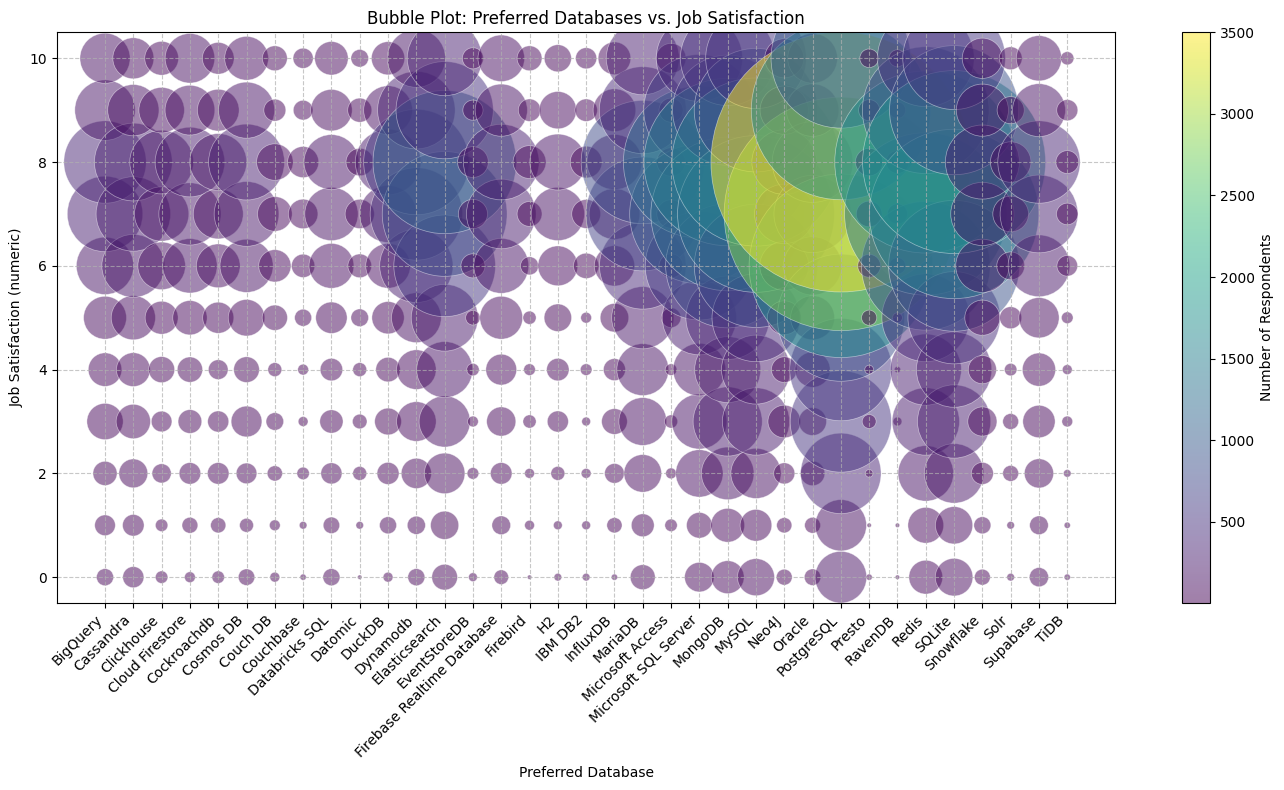

In [6]:
##Write your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for DatabaseWantToWorkWith and JobSat
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# Convert JobSat to numeric (if needed)
df_db['JobSatNum'] = pd.to_numeric(df_db['JobSat'], errors='coerce')

# Split databases and explode into separate rows
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_db = df_db.explode('DatabaseWantToWorkWith')

# Group by Database and JobSat, count occurrences
db_counts = df_db.groupby(['DatabaseWantToWorkWith', 'JobSatNum']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    db_counts['DatabaseWantToWorkWith'],
    db_counts['JobSatNum'],
    s=db_counts['Count'] * 10,  # Scale bubble size
    alpha=0.5,
    c=db_counts['Count'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Number of Respondents')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction (numeric)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


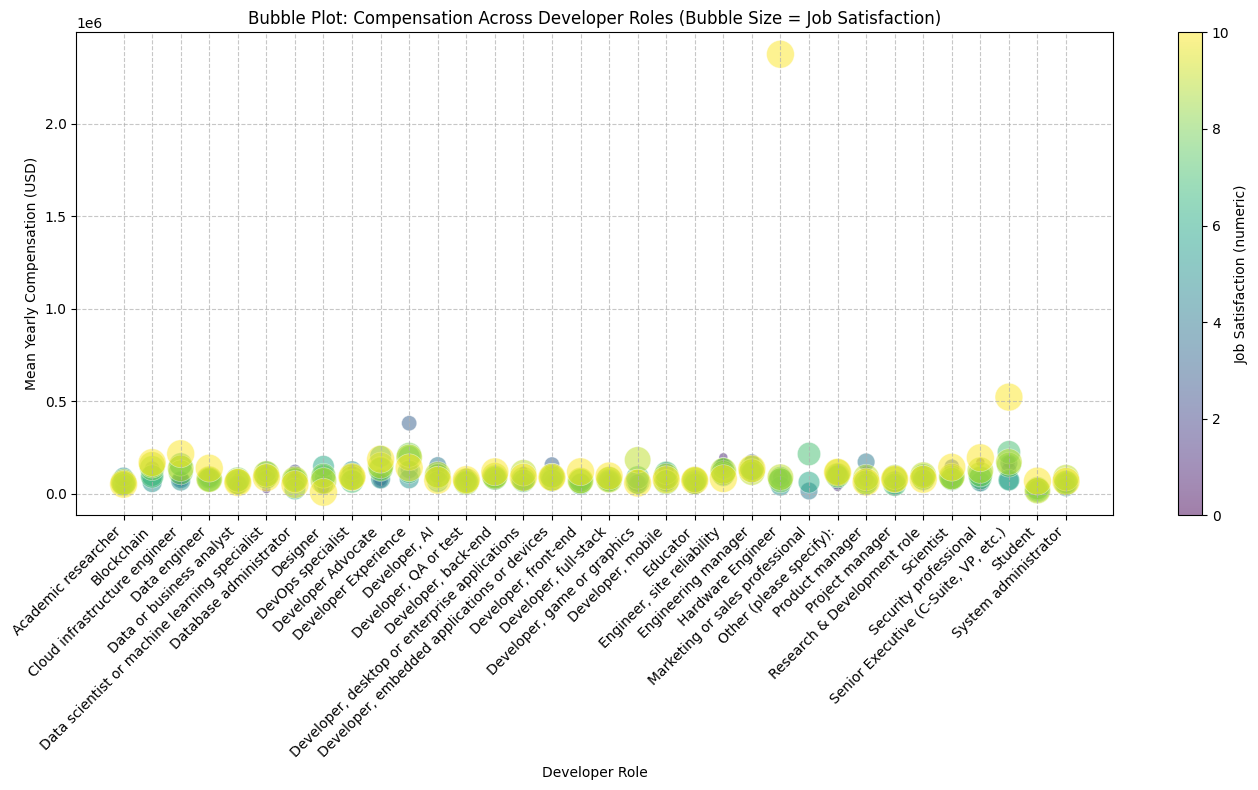

In [7]:
##Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for ConvertedCompYearly, DevType, and JobSat
df_roles = df[['ConvertedCompYearly', 'DevType', 'JobSat']].dropna()

# Convert JobSat to numeric (if needed)
df_roles['JobSatNum'] = pd.to_numeric(df_roles['JobSat'], errors='coerce')

# Split DevType and explode into separate rows (in case of multiple roles per respondent)
df_roles['DevType'] = df_roles['DevType'].str.split(';')
df_roles = df_roles.explode('DevType')

# Drop rows with missing numeric values
df_roles = df_roles.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSatNum'])

# Group by DevType and JobSatNum, calculate mean compensation and count
role_stats = df_roles.groupby(['DevType', 'JobSatNum']).agg(
    MeanComp=('ConvertedCompYearly', 'mean'),
    Count=('ConvertedCompYearly', 'size')
).reset_index()

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    role_stats['DevType'],
    role_stats['MeanComp'],
    s=role_stats['JobSatNum'] * 40,  # Bubble size = job satisfaction (scaled)
    alpha=0.5,
    c=role_stats['JobSatNum'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Job Satisfaction (numeric)')
plt.title('Bubble Plot: Compensation Across Developer Roles (Bubble Size = Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Mean Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


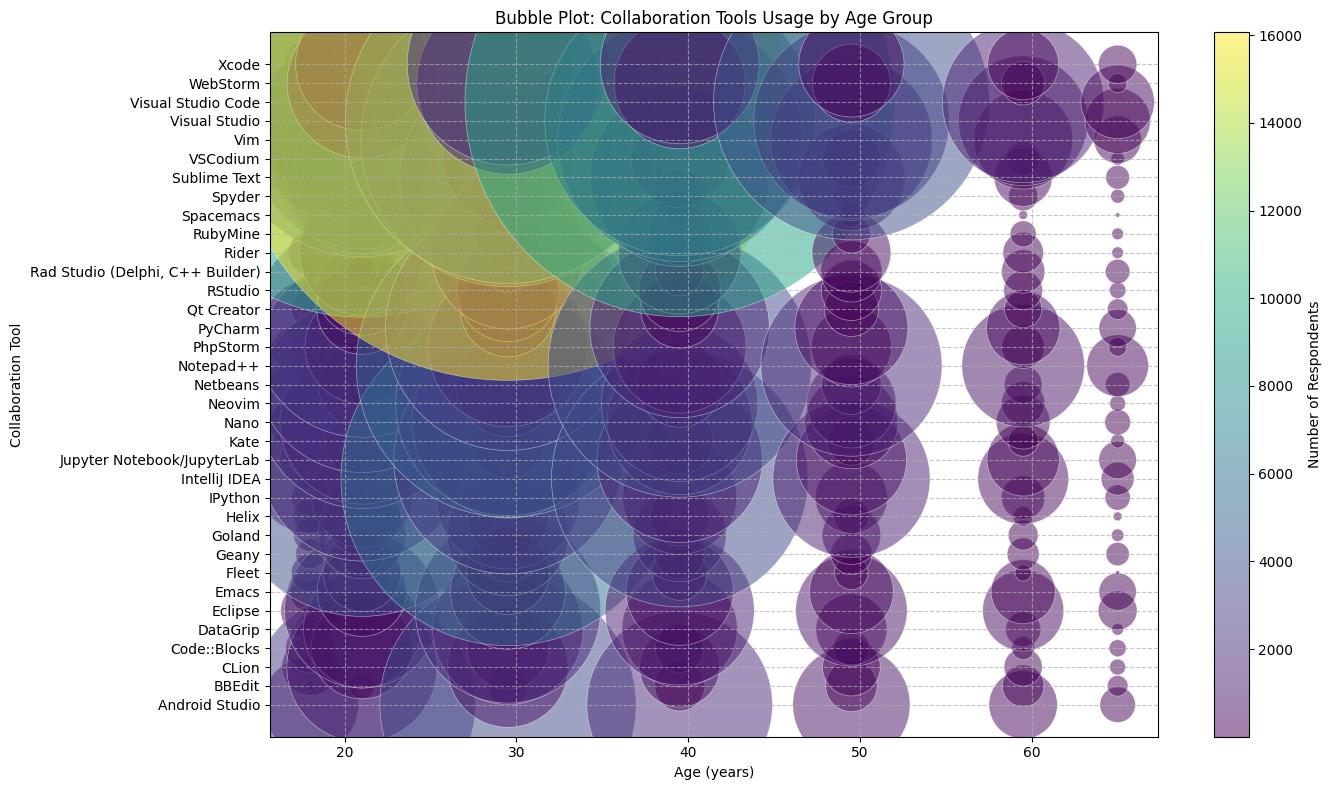

In [8]:
##Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for Age and NEWCollabToolsHaveWorkedWith
df_tools = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Convert Age to numeric midpoints for grouping
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

df_tools['AgeNum'] = df_tools['Age'].apply(age_to_midpoint)

# Split tools and explode into separate rows
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools = df_tools.explode('NEWCollabToolsHaveWorkedWith')

# Group by AgeNum and Tool, count occurrences
tool_counts = df_tools.groupby(['AgeNum', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    tool_counts['AgeNum'],
    tool_counts['NEWCollabToolsHaveWorkedWith'],
    s=tool_counts['Count'] * 10,  # Scale bubble size
    alpha=0.5,
    c=tool_counts['Count'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Number of Respondents')
plt.title('Bubble Plot: Collaboration Tools Usage by Age Group')
plt.xlabel('Age (years)')
plt.ylabel('Collaboration Tool')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



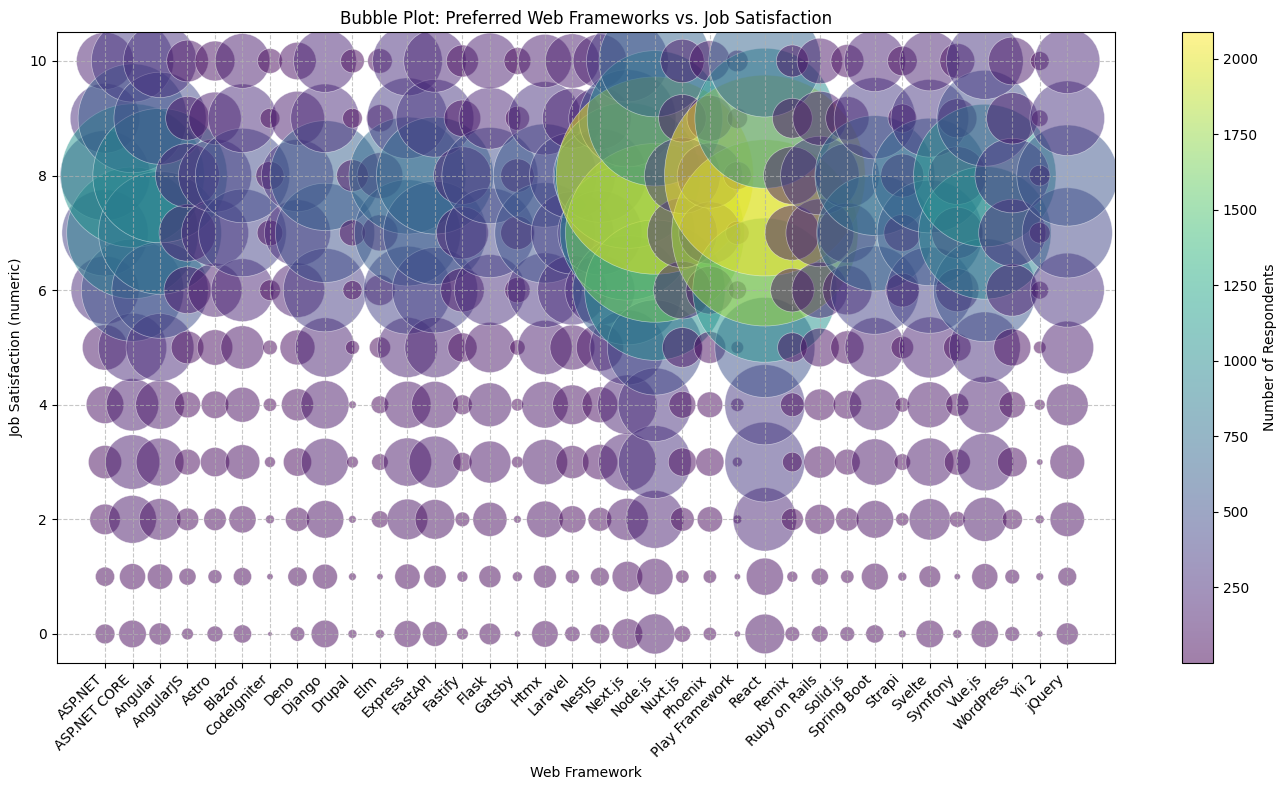

In [9]:
##Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for WebframeWantToWorkWith and JobSat
df_web = df[['WebframeWantToWorkWith', 'JobSat']].dropna()

# Convert JobSat to numeric (if needed)
df_web['JobSatNum'] = pd.to_numeric(df_web['JobSat'], errors='coerce')

# Split frameworks and explode into separate rows
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('WebframeWantToWorkWith')

# Group by Web Framework and JobSat, count occurrences
web_counts = df_web.groupby(['WebframeWantToWorkWith', 'JobSatNum']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    web_counts['WebframeWantToWorkWith'],
    web_counts['JobSatNum'],
    s=web_counts['Count'] * 10,  # Scale bubble size
    alpha=0.5,
    c=web_counts['Count'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Number of Respondents')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction (numeric)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



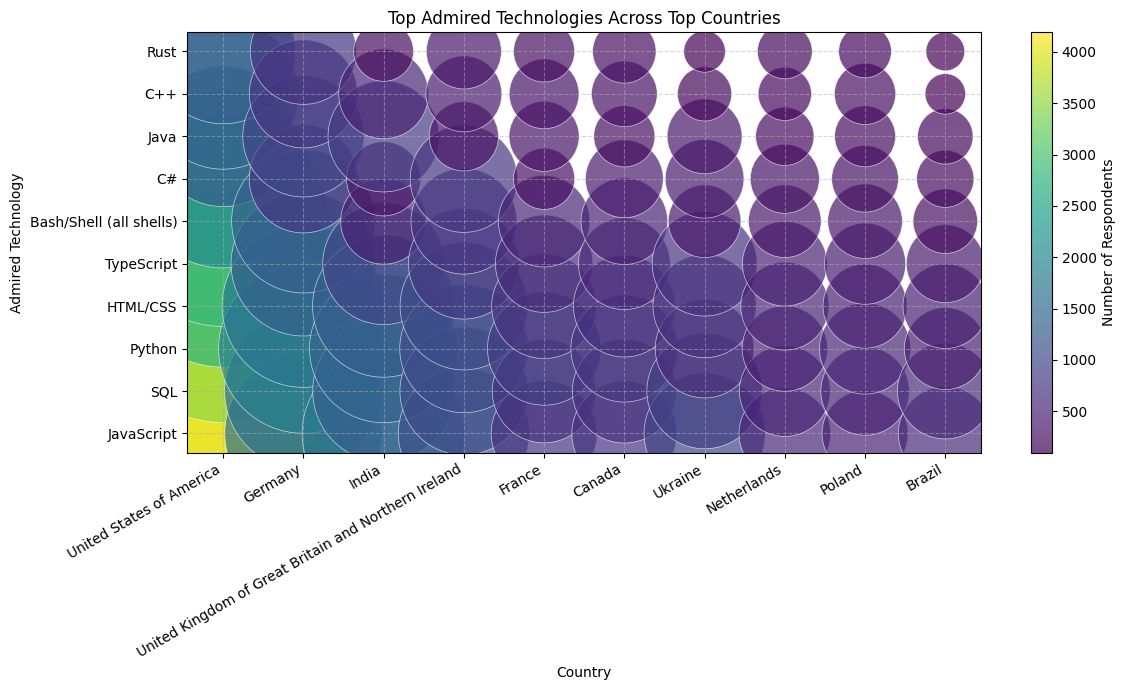

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: drop missing values for LanguageAdmired and Country
df_admired = df[['LanguageAdmired', 'Country']].dropna()

# Split admired languages and explode into separate rows
df_admired['LanguageAdmired'] = df_admired['LanguageAdmired'].str.split(';')
df_admired = df_admired.explode('LanguageAdmired')

# Get top 10 countries and top 10 admired technologies by frequency
top_countries = df_admired['Country'].value_counts().head(10).index
top_techs = df_admired['LanguageAdmired'].value_counts().head(10).index

# Filter data
df_filtered = df_admired[
    df_admired['Country'].isin(top_countries) & 
    df_admired['LanguageAdmired'].isin(top_techs)
]

# Group by Country and LanguageAdmired, count occurrences
admired_counts = df_filtered.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Count')

# Sort for better visualization
admired_counts['Country'] = pd.Categorical(admired_counts['Country'], categories=top_countries, ordered=True)
admired_counts['LanguageAdmired'] = pd.Categorical(admired_counts['LanguageAdmired'], categories=top_techs, ordered=True)
admired_counts = admired_counts.sort_values(['Country', 'LanguageAdmired'])

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    admired_counts['Country'],
    admired_counts['LanguageAdmired'],
    s=admired_counts['Count'] * 8,  # Smaller bubbles
    alpha=0.7,
    c=admired_counts['Count'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Number of Respondents')
plt.title('Top Admired Technologies Across Top Countries')
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
